## this will be another attempt to create a budgeted M term

I think we should start with the heat budget and try to do the M term from the advective term

This should ideally be budgeted already because the internal advective terms will cancel.

In [2]:
# auto-reload edited modules
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, "/home/mmurakami/crios_backups/an_helper_functions")

# run the script into the current kernel (vars/functions become available)
%run -i "/home/mmurakami/crios_backups/an_helper_functions/load_packages.py"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## I think we should start with a very small (2x2 box and see if we can do this)

Any vertical advection should be included in the internal mixing

In [3]:
# create an array of the time steps we want to read
# use ts2dte to get december 2014
# first make an array of filenames
dt_aste = 600
startyr = 2002
endyr = 2019

# all the filenames in the system
fnames = get_fnames(dt_aste,startyr,endyr)

times = {}
times["2016"] = np.arange(1,3,1)

# the filenames we want for 2014
tsstr,datetimes = get_tsteps(times,fnames,dt_aste,startyr,1,1)

t2 = int(tsstr[1])    # this is the averages file that we want to read from when we do budgeting

In [4]:
xs = np.array([[25,26],[25,26]])
ys = np.array([[525,525],[527,527]])

(520.0, 530.0)

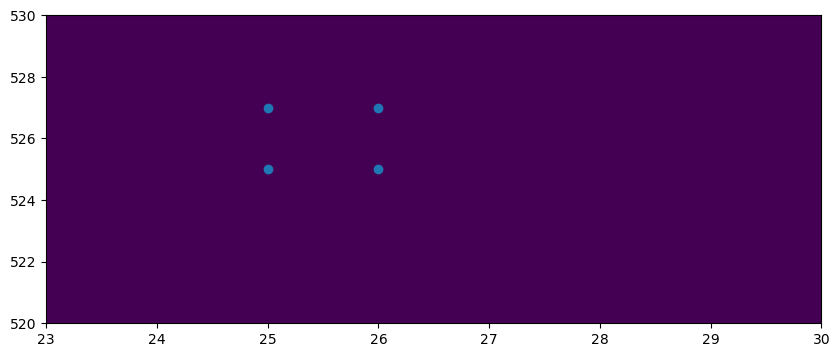

In [5]:
plt.pcolormesh(mymsk)
plt.scatter(xs,ys)
plt.xlim(23,30)
plt.ylim(520,530)

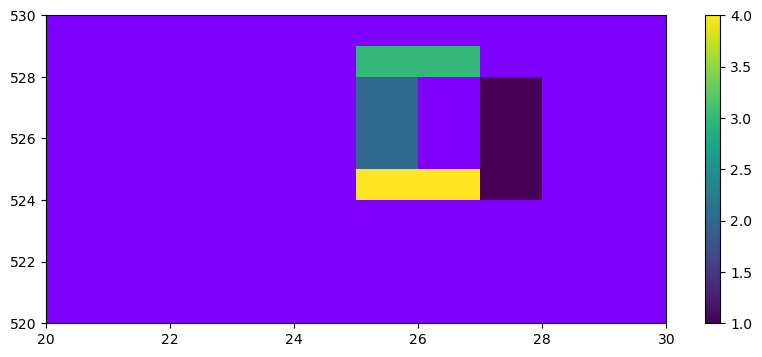

In [5]:
# this will be our box
mymsk2 = np.zeros((ny,nx))
mymsk2[ys,xs] = 1
mymsk2[ys-1,xs] = 1
mymsk2[ys[0],xs[0]] = 1
# mymsk = mymsk2
gate_mask = np.zeros((ny, nx), dtype=float)

## first define the edges based on the gates we have (considering all else to be 0)
testx = mymsk2[:,1:] - mymsk2[:,:-1]
testy = mymsk2[1:,:] - mymsk2[:-1,:]
westi = np.where(testx == 1)
easti = np.where(testx == -1)
northi = np.where(testy == -1)
southi = np.where(testy == 1)

# print(westi,easti,northi,southi)

# Extract row/col indices
ex, ey = easti
wx, wy = westi
nix, niy = northi
sx, sy = southi

# Shift east (+1 in x direction = columns)
ey_shift = np.clip(ey + 1, 0, gate_mask.shape[1] - 1)
# Shift north (+1 in y direction = rows)
nx_shift = np.clip(nix + 1, 0, gate_mask.shape[0] - 1)

# Shift east (+1 in x direction = columns)
wy_shift = np.clip(wy + 1, 0, gate_mask.shape[1] - 1)
# Shift north (+1 in y direction = rows)
sx_shift = np.clip(sx + 1, 0, gate_mask.shape[0] - 1)

# Assign codes
gate_mask[ex, ey_shift] = 1   # shifted east
gate_mask[wx, wy_shift] = 2         # west (no shift)
gate_mask[nx_shift, niy] = 3   # shifted north
gate_mask[sx_shift, sy] = 4         # south (no shift)

# filter based on the landmsk
lm = (landmsk.astype(bool))
p = np.pad(lm, ((1,1),(1,1)), constant_values=False)

# 4-neighbor adjacency (N,S,E,W)
nbr4 = (p[:-2,1:-1] | p[2:,1:-1] | p[1:-1,:-2] | p[1:-1,2:])


# Plot
gate_mask[gate_mask == 0] = np.nan
plt.pcolormesh(mymsk,cmap="rainbow")
plt.pcolormesh(gate_mask * hfC[0])  # we need to do this to mask land
gate_mask = gate_mask * hfC[0]
plt.ylim(520, 530)
plt.xlim(20, 30)
plt.colorbar()
plt.show()


In [6]:
np.where(~np.isnan(gate_mask))[0].shape

(11,)

In [7]:
# try with mymsk2 for the ADV term (1 will be +x, 2 will be -x, 3 will be -y, 4 will be +y )
mymsk2[mymsk2 == 0] = np.nan
mymsk = mymsk2

## do the salt budget for this box for the timesteps in tsstr

## try the previous way


In [8]:
# plt.pcolormesh(get_aste_tracer(mymsk,nfx,nfy)[0])
vol = np.tile(mygrid['DXG'][np.newaxis,:,:],(50,1,1)) * np.tile(mygrid['DYG'][np.newaxis,:,:],(50,1,1)) * DRF3d
# vol = np

In [9]:
# set a larger array for one year of the terms
nS,nT = 112,112
vol_mesh_all = np.zeros((1,nS,nT))
JtermsT_all = np.zeros((1,5,nS,nT))  # recall this is in the format tend, adv, df, kpp, and surface
JtermsS_all = np.zeros((1,5,nS,nT))
JtermsT_nn_all = np.zeros((1,5,nS,nT))
JtermsS_nn_all = np.zeros((1,5,nS,nT))

dstart = 0
dterm = 50  # for upper 100 m
for i in range(len(datetimes)-1):
    print(datetimes[i])
    tsstrhere = tsstr[i:i+2]
    datetimeshere = datetimes[i:i+2]
    dt = datetimes[i+1]-datetimes[i]
    dt = dt.total_seconds()
    t2 = int(tsstr[i+1])

    # run the function - check if this works
    vol_mesh,JtermsT,JtermsS,JtermsT_nn,JtermsS_nn,bT,bS = get_Jterms(fnames,tsstrhere,datetimeshere,dt,t2,mymsk,6,RAC,RAC3,myparms,dstart,dterm)

    vol_mesh_all[i] = vol_mesh
    JtermsT_all[i] = JtermsT
    JtermsS_all[i] = JtermsS
    JtermsT_nn_all[i] = JtermsT_nn
    JtermsS_nn_all[i] = JtermsS_nn

2016-01-01 00:00:00
doing salt budget
doing heat budget
2
doing volume
doing TS binning
creating the J terms now
doing JtermsT
total residual -5.580747215532759e-14 Sv/PSU
doing JtermsS
total residual -7.032452951270099e-13 Sv/degC
doing not normalized J terms
total residual -5.580747215532759e-14 Sv
total residual -7.032452951270099e-13 Sv


In [10]:
# read adv and dfe
file_name = "budg3d_hflux_set2"
meta_budg3d_hflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
varnames = np.array(["ADVx_SLT","ADVy_SLT","DFxE_SLT","DFyE_SLT"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
ADVx_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
ADVy_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
DFxE_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
DFyE_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[3])

# ADV face fields (3D, nz x ny x nx)
U = ADVx_SLT.reshape(nz, ny, nx)   # x-face flux
V = ADVy_SLT.reshape(nz, ny, nx)   # y-face flux

gate_hconv = np.zeros((nz, ny, nx), dtype=float)

# --- EAST gates: add U at the east face (i+1) ---
je, ie = np.where(gate_mask == 1)
m = (ie + 1 < nx)                  # stay in-bounds
je, ie = je[m], ie[m]
gate_hconv[:, je, ie] += U[:, je, ie]

# --- WEST gates: subtract U at the west face (i) ---
jw, iw = np.where(gate_mask == 2)
gate_hconv[:, jw, iw] -= U[:, jw, iw]

# --- NORTH gates: add V at the north face (j+1) ---
jn, inx = np.where(gate_mask == 3)
m = (jn + 1 < ny)
jn, inx = jn[m], inx[m]
gate_hconv[:, jn, inx] += V[:, jn, inx]

# --- SOUTH gates: subtract V at the south face (j) ---
js, isx = np.where(gate_mask == 4)
gate_hconv[:, js, isx] -= V[:, js, isx]

# convert to g/s if needed (matches your earlier ADV_hconv units)
budgO['saltfluxes']['ADV_hconv'] = gate_hconv * myparms['rhoconst']

NameError: name 'budgO' is not defined

In [356]:

def get_Jterms(fnames,tsstr,datetimes,dt,t2,mymsk,iB,RAC,RAC3,myparms,gate_mask,dstart=0,dterm=50):
    '''
    The goal of this will be to return the arrays JtermsT and JtermsS for one month, as well as JtermsT and S without normalizing by binwidths

    Inputs:
        tsstr: the filenames we want to access
        datetimes: the np datetime64 files that we want to access (from the beginning and end of the averaged files)
        dt: the local dt in seconds between the two timesteps
        mymsk: the mask in compact format (shape ny,nx) of the mask we want to select from
        RAC: the area of the cells in compact form (ny,nx)
        RAC3: the mk3d mod of the cells in compact form (nz,ny,nx)
        dterm: the depth up to which we want to calculate the J terms (automatically nz if not set)

    Outputs:
        vol_mesh: volume in TS space
        JtermsT: temperature J terms of the units Sv/PSU
        JtermsS: salinity J terms of the units Sv/degC
        JtermsT_nn: J terms for T in units Sv
        JtermsS_nn: J terms for S in units Sv
    
    '''
    #############################################################################
    print("doing salt budget")
    # create the salt budget
    AB_gT=0
    AB_gS=0
    file_name = 'budg3d_snap_set2'
    meta_budg3d_snap_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg3d_snap_set2["fldList"])
    varnames = np.array(["SALTDR"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    
    
    SALTDR = np.full((len(tsstr),nz,ny,nx),np.nan)
    for i in range(len(tsstr)):
        thisSALTDR,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[0])
        thisSALTDR = thisSALTDR.reshape(nz,ny,nx)
        SALTDR[i] = thisSALTDR
    
    SALTDR =  (SALTDR[1, :, :,:] - SALTDR[0, :,:, :]) / dt    # PSU.m/s
    #print(np.nansum(SALTDR),dt)

    tmptend = myparms['rhoconst'] * (SALTDR - AB_gS) * mk3D_mod(RAC,SALTDR)    # kg/m^3 * PSU.m/s * m^2 = g/s
    #print(np.nansum(mk3D_mod(RAC,SALTDR)))
    #print(np.nansum((SALTDR - AB_gS)))
    #print( myparms['rhoconst'])
    budgO = {}
    budgO['saltfluxes'] = {}
    budgI = {}
    budgI['saltfluxes'] = {}
    budgOI = {}
    
    # ocean
    
    budgO['saltfluxes']['tend'] = tmptend
    budgO['salttend'] = np.nansum(tmptend,axis=0)


    # read adv and dfe
    file_name = "budg3d_hflux_set2"
    meta_budg3d_hflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
    varnames = np.array(["ADVx_SLT","ADVy_SLT","DFxE_SLT","DFyE_SLT"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    ADVx_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
    ADVy_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
    DFxE_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
    DFyE_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[3])
    
    tmpUo = myparms['rhoconst'] * (ADVx_SLT + DFxE_SLT)
    tmpVo = myparms['rhoconst'] * (ADVy_SLT + DFyE_SLT)
    
    # reshape and get the faces
    tmpUo = tmpUo.reshape(nz,ny,nx)
    tmpVo = tmpVo.reshape(nz,ny,nx)
    tmpUo = get_aste_faces(tmpUo,nfx,nfy)              
    tmpVo = get_aste_faces(tmpVo,nfx,nfy)
    
    budgO['saltfluxes']['hconv'] = calc_UV_conv_mod(nfx,nfy,tmpUo,tmpVo)
    budgO['salthconv'] = calc_UV_conv_mod(nfx,nfy,np.nansum(tmpUo,axis=0),np.nansum(tmpVo,axis=0))
    
    # get the gate hconv
    U = ADVx_SLT.reshape(nz, ny, nx)   # x-face flux
    V = ADVy_SLT.reshape(nz, ny, nx)   # y-face flux

    gate_hconv = np.zeros((nz, ny, nx), dtype=float)

    # --- EAST gates: add U at the east face (i+1) ---
    je, ie = np.where(gate_mask == 1)
    m = (ie + 1 < nx)                  # stay in-bounds
    je, ie = je[m], ie[m]
    gate_hconv[:, je, ie] -= U[:, je, ie]

    # --- WEST gates: subtract U at the west face (i) ---
    jw, iw = np.where(gate_mask == 2)
    gate_hconv[:, jw, iw] += U[:, jw, iw]

    # --- NORTH gates: add V at the north face (j+1) ---
    jn, inx = np.where(gate_mask == 3)
    m = (jn + 1 < ny)
    jn, inx = jn[m], inx[m]
    gate_hconv[:, jn, inx] -= V[:, jn, inx]

    # --- SOUTH gates: subtract V at the south face (j) ---
    js, isx = np.where(gate_mask == 4)
    gate_hconv[:, js, isx] += V[:, js, isx]

    # convert to g/s if needed (matches your earlier ADV_hconv units)
    budgO['saltfluxes']['ADV_gateconv'] = gate_hconv * myparms['rhoconst']  # g/s


    # also do hconv for ADV and DF
    tmpUo = get_aste_faces(ADVx_SLT.reshape(nz,ny,nx),nfx,nfy)
    tmpVo = get_aste_faces(ADVy_SLT.reshape(nz,ny,nx),nfx,nfy)
    budgO['saltfluxes']['ADV_hconv'] = calc_UV_conv_mod(nfx,nfy,tmpUo,tmpVo) * myparms['rhoconst'] #g/s
    
    tmpUo = get_aste_faces(DFxE_SLT.reshape(nz,ny,nx),nfx,nfy)
    tmpVo = get_aste_faces(DFyE_SLT.reshape(nz,ny,nx),nfx,nfy)
    budgO['saltfluxes']['DF_hconv'] = calc_UV_conv_mod(nfx,nfy,tmpUo,tmpVo) * myparms['rhoconst'] #g/s

    # read the vars
    file_name = "budg2d_hflux_set1"
    meta_budg2d_hflux_set1 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg2d_hflux_set1["fldList"])
    varnames = np.array(["ADVxHEFF","ADVyHEFF","DFxEHEFF","DFyEHEFF"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    ADVxHEFF,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
    ADVyHEFF,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
    DFxEHEFF,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
    DFyEHEFF,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[3])
    ADVxHEFF = ADVxHEFF.reshape(ny,nx)
    ADVyHEFF = ADVxHEFF.reshape(ny,nx)
    DFxEHEFF = DFxEHEFF.reshape(ny,nx)
    DFyEHEFF = DFyEHEFF.reshape(ny,nx)
        
    if myparms['seaice_variable_salinity_flag'] == 0:
        SIsal0 = myparms['SIsal0']
    
    tmpUi = SIsal0 * myparms['rhoi'] * (DFxEHEFF + ADVxHEFF)
    tmpVi = SIsal0 * myparms['rhoi'] * (DFyEHEFF + ADVyHEFF)
    tmpUi = get_aste_faces(tmpUi,nfx,nfy)              
    tmpVi = get_aste_faces(tmpVi,nfx,nfy)
    
    budgI['salthconv'] = calc_UV_conv_mod(nfx,nfy,tmpUi, tmpVi)
    budgOI['salthconv'] = (budgO['salthconv'] + budgI['salthconv'])


    # read fluxes
    file_name = 'budg2d_zflux_set1'
    meta_budg2d_zflux_set1 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg2d_zflux_set1["fldList"])
    varnames = np.array(["oceSPflx","SFLUX"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    oceSPflx,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
    SFLUX,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
    oceSPflx = oceSPflx.reshape(ny,nx)
    SFLUX = SFLUX.reshape(ny,nx)
    
    # read relax and salt mass
    file_name = "budg2d_zflux_set2"
    meta_budg2d_zflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg2d_zflux_set2["fldList"])
    varnames = np.array(["oceSflux","WSLTMASS","SRELAX"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        if len(irec[0]) > 0:
            recs = np.append(recs, irec[0][0])
    oceSflux,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
    WSLTMASS,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
    SRELAX,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
    oceSflux = oceSflux.reshape(ny,nx)
    WSLTMASS = WSLTMASS.reshape(ny,nx)
    SRELAX = SRELAX.reshape(ny,nx)


    # read kpp tend and from 3d zflux
    file_name = "budg3d_kpptend_set1"
    meta_budg3d_kpptend_set1 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg3d_kpptend_set1["fldList"])
    varnames = np.array(["oceSPtnd","KPPg_SLT"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        if len(irec[0]) > 0:
            recs = np.append(recs, irec[0][0])
    oceSPtnd,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
    KPPg_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
    oceSPtnd = oceSPtnd.reshape(nz,ny,nx)
    KPPg_SLT = KPPg_SLT.reshape(nz,ny,nx)
    
    
    # now 3d zfluxes
    file_name = "budg3d_zflux_set2"
    meta_budg3d_zflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg3d_zflux_set2["fldList"])
    varnames = np.array(["ADVr_SLT","DFrE_SLT","DFrI_SLT"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    ADVr_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
    DFrE_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
    DFrI_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
    ADVr_SLT = ADVr_SLT.reshape(nz,ny,nx)
    DFrE_SLT = DFrE_SLT.reshape(nz,ny,nx)
    DFrI_SLT = DFrI_SLT.reshape(nz,ny,nx)

    if myparms["useRFWF"]==0 or myparms['useNLFS']==0:
        print('do nothing')
    else:
        oceSflux = 0 * oceSflux
    
    if myparms['useNLFS'] == 0:
        print('do nothing, already read above')
    else:
        WSLTMASS=0*WSLTMASS
    
    budgO['saltzconv'] = SFLUX + oceSPflx                  # W/m^2
    zconv_top_salt = (SFLUX + oceSPflx) * RAC               # g/s
    budgI['saltzconv'] = -budgO['saltzconv'] + SRELAX
    
    if myparms['useNLFS']==0:
        budgO['saltzconv'] = budgO['saltzconv'] - myparms['rhoconst']*WSLTMASS
    
    if myparms['useRFWF']==0 or myparms['useNLFS']==0:
        budgI['saltzconv']=-oceSflux


    nr = mygrid['RC'].shape[0]
    # break trWtop down into smaller terms
    trWtopADV = -(ADVr_SLT)*myparms['rhoconst']           # g/s
    trWtopDF = -(DFrE_SLT+DFrI_SLT)*myparms['rhoconst']   # g/s
    trWtopKPP = -(KPPg_SLT)*myparms['rhoconst']           # g/s
    trWtop = trWtopADV + trWtopDF + trWtopKPP             # g/s 
    
    #print(trWtop.shape)
    sptop = mk3D_mod(oceSPflx,oceSPtnd) - np.cumsum(oceSPtnd, axis=0)        # we include this in our zconv_top term
    sptop = sptop * RAC3        # g/s
    
    trWtop[1:,:,:] = trWtop[1:,:,:] + sptop[:-1,:,:]
    trWtop[0,:,:] = budgO['saltzconv'] * RAC    # g/s top layer is surface flux
    
    trWbot = np.zeros_like(trWtop)
    trWbot[:-1,:,:] = trWtop[1:,:,:]
    trWbot[-1,:,:] = 0
    
    budgO['saltfluxes']['trWtop'] = trWtop     # g/s
    budgO['saltfluxes']['trWbot'] = trWbot     # g/s
    
    budgI['saltfluxes']['trWtop'] = -RAC*0
    budgI['saltfluxes']['trWbot'] = budgO['saltfluxes']['trWtop'][0,:,:]  # surface because ice
    
    budgO['saltfluxes']['zconv'] = budgO['saltfluxes']['trWtop'] - budgO['saltfluxes']['trWbot']
    budgO['saltzconv'] = RAC * budgO['saltzconv']   # g/s
    budgI['saltzconv'] = RAC * budgI['saltzconv']   # g/s
    budgOI['saltzconv'] = budgO['saltzconv'] + budgI['saltzconv']

    # do vertical convergence for ADV and DF terms
    tmpadv = np.full((nz,ny,nx),np.nan)
    tmpadv[:-1,:,:] = (trWtopADV[:-1] - trWtopADV[1:])              # for surface thru seafloor
    
    Sconv = budgO['saltfluxes']['ADV_hconv'] + tmpadv
    budgO['saltfluxes']['ADV_zconv'] = tmpadv
    budgO['saltfluxes']['ADV_Sconv'] = Sconv             # g/s, this is the advective arrow of S for a

    # do vertical convergence for ADV and DF terms
    tmpdf = np.full((nz,ny,nx),np.nan)
    tmpdf[:-1,:,:] = (trWtopDF[:-1] - trWtopDF[1:])              # for surface thru seafloor
    
    dfSconv = budgO['saltfluxes']['DF_hconv'] + tmpdf
    budgO['saltfluxes']['DF_Sconv'] = dfSconv             # g/s, this is the diffusive arrow of T for a cell


    tmpkpp = np.full((nz,ny,nx),np.nan)
    tmpkpp[:-1,:,:] = trWtopKPP[:-1] - trWtopKPP[1:]
    budgO['saltfluxes']['KPP_Sconv'] = tmpkpp        # no horizontal component for this


    #############################################################################
    print("doing heat budget")
    # create the heat budget
    # read thetadr
    file_name = 'budg3d_snap_set2'
    meta_budg3d_snap_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg3d_snap_set2["fldList"])
    varnames = np.array(["THETADR"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    
    THETADR = np.full((len(tsstr),nz,ny,nx),np.nan)
    for i in range(len(tsstr)):
        thisTHETADR,its,meta = rdmds(os.path.join(dirIn, file_name),int(tsstr[i]),returnmeta=True,rec=recs[0])
        thisTHETADR = thisTHETADR.reshape(nz,ny,nx)
        THETADR[i] = thisTHETADR
    
    THETADR =  (THETADR[1, :, :,:] - THETADR[0, :,:, :]) / dt    # degC.m/

    tmptend=myparms['rcp']*(THETADR-AB_gT)*mk3D_mod(RAC,THETADR)   # J/m^3.degC * degC.m/s * m^2 = J/s
    budgO['heatfluxes'] = {}
    budgI['heatfluxes'] = {}
    
    budgO['heatfluxes']['tend'] = tmptend     # J/s
    
    budgO['heattend'] = np.nansum(tmptend,axis=0)

    file_name = "budg3d_hflux_set2"
    meta_budg3d_hflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
    varnames = np.array(["ADVx_TH","ADVy_TH","DFxE_TH","DFyE_TH","UVELMASS","VVELMASS"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    ADVx_TH,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
    ADVy_TH,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
    DFxE_TH,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
    DFyE_TH,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[3])
    # UVELMASS,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[4])
    # VVELMASS,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[5])  # m/s
    
    # reshape the UVELMASS and VVELMASS to look at these
    # UVELMASS = UVELMASS.reshape(nz,ny,nx)
    # VVELMASS = VVELMASS.reshape(nz,ny,nx)
    
    tmpUo = myparms['rcp'] * (ADVx_TH + DFxE_TH)
    tmpVo = myparms['rcp'] * (ADVy_TH + DFyE_TH)
    
    tmpUo = tmpUo.reshape(nz,ny,nx)
    tmpVo = tmpVo.reshape(nz,ny,nx)
    
    # get the faces so we can do convergence
    tmpUo = get_aste_faces(tmpUo,nfx,nfy)              
    tmpVo = get_aste_faces(tmpVo,nfx,nfy)
    
    budgO['heatfluxes']['hconv'] = calc_UV_conv_mod(nfx,nfy,tmpUo,tmpVo)
    budgO['heathconv'] = calc_UV_conv_mod(nfx,nfy,np.nansum(tmpUo, axis=0),np.nansum(tmpVo,axis=0))

    # add the budgeting for ADV and DF
    tmpUo = get_aste_faces(ADVx_TH.reshape(nz,ny,nx),nfx,nfy)
    tmpVo = get_aste_faces(ADVy_TH.reshape(nz,ny,nx),nfx,nfy)
    budgO['heatfluxes']['ADV_hconv'] = calc_UV_conv_mod(nfx,nfy,tmpUo,tmpVo) * myparms['rcp'] #J/s
    
    tmpUo = get_aste_faces(DFxE_TH.reshape(nz,ny,nx),nfx,nfy)
    tmpVo = get_aste_faces(DFyE_TH.reshape(nz,ny,nx),nfx,nfy)
    budgO['heatfluxes']['DF_hconv'] = calc_UV_conv_mod(nfx,nfy,tmpUo,tmpVo) * myparms['rcp'] #J/s

    file_name = 'budg2d_zflux_set1'
    meta_budg2d_zflux_set1 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg2d_zflux_set1["fldList"])
    varnames = np.array(["TFLUX","oceQsw","SItflux"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    TFLUX,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
    oceQsw,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
    SItflux,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
    TFLUX = TFLUX.reshape(ny,nx)
    oceQsw = oceQsw.reshape(ny,nx)
    SItflux = SItflux.reshape(ny,nx)
    
    # note: the following works provided that the first 3 terms are definitely there
    file_name = "budg2d_zflux_set2"
    meta_budg2d_zflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg2d_zflux_set2["fldList"])
    varnames = np.array(["oceQnet","WTHMASS","SIaaflux","TRELAX"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    oceQnet,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
    WTHMASS,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
    SIaaflux,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
    TRELAX,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[3])
    oceQnet = oceQnet.reshape(ny,nx)
    WTHMASS = WTHMASS.reshape(ny,nx)
    SIaaflux = SIaaflux.reshape(ny,nx)
    TRELAX = TRELAX.reshape(ny,nx)
    
    # note: will not work if these are defined, fix for future steps
    varnames = np.array(["TRELAX","SIabflux","SIacflux","SIeprflx","SIfldflx"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        if len(irec[0]) > 0:
            recs = np.append(recs, irec[0][0])
    
    # if len(recs) == 0:
    SIabflux = np.zeros((ny, nx))
    SIacflux = np.zeros((ny, nx))
    SIeprflx = np.zeros((ny, nx))
    SIfldflx = np.zeros((ny, nx))
    if myparms['useNLFS'] == 0:
        print('do nothing, already read above')
    else:
        WTHMASS=0*WTHMASS

    geothFlux = 0
    
    if myparms['SaltPlumeHeatFlux']:
        print(1)
    else:
        SPforcT1=0*np.ones((ny,nx))
        oceEPtnd=0*np.ones((nz,ny,nx))


    # read kpp tend and from 3d zflux
    file_name = "budg3d_kpptend_set1"
    meta_budg3d_kpptend_set1 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg3d_kpptend_set1["fldList"])
    varnames = np.array(["KPPg_TH"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    KPPg_TH,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
    KPPg_TH = KPPg_TH.reshape(nz,ny,nx)
    
    # now 3d zfluxes
    file_name = "budg3d_zflux_set2"
    meta_budg3d_zflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg3d_zflux_set2["fldList"])
    varnames = np.array(["ADVr_TH","DFrE_TH","DFrI_TH"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    ADVr_TH,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
    DFrE_TH,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
    DFrI_TH,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
    ADVr_TH = ADVr_TH.reshape(nz,ny,nx)
    DFrE_TH = DFrE_TH.reshape(nz,ny,nx)
    DFrI_TH = DFrI_TH.reshape(nz,ny,nx)

    budgO['heatzconv']=TFLUX+geothFlux+SPforcT1                           # W/m^2 = J/m^2/s
    zconv_top_heat = TFLUX  * RAC     # W/m^2 * m^2 = J/s
    budgI['heatzconv']=-(SItflux+TFLUX-TRELAX+SPforcT1)
    
    if myparms['useNLFS']==0:
        print(1)
        budgO['heatzconv']=budgO['heatzconv']-myparms['rcp']*WTHMASS[:,:]     # degC.m/s * J/m^3degC = J/m^2.s
    
    budgI['heatzconv']=budgI['heatzconv']-SIabflux+SIacflux+SIeprflx
    if(myparms['SEAICEheatConsFix']==0):
        print(2)
        budgI['heatzconv']=budgI['heatzconv']+SIaaflux

    nr = mygrid['RC'].shape[0]
    trWtopADV = -(ADVr_TH) * myparms['rcp']         # J/s
    trWtopDF = -(DFrE_TH+DFrI_TH) * myparms['rcp']  # J/s
    trWtopKPP = -(KPPg_TH) * myparms['rcp']         # J/s
    trWtop = trWtopADV + trWtopDF + trWtopKPP       # J/s
    dd = mygrid['RF'][:-1]
    swfrac = 0.62*np.exp(dd/0.6)+(1-0.62)*np.exp(dd/20)
    swfrac[dd < -200] = 0
    swtop=mk3D_mod(swfrac,trWtop)*mk3D_mod(RAC*oceQsw,trWtop)   # J/s
    mskC=mygrid['mskC']
    swtop[np.isnan(mskC)]=0
    trWtop=trWtop+swtop  # 323
        
    trWtop[0,:,:]=budgO['heatzconv']*RAC
    trWbot = np.zeros_like(trWtop)
    trWbot[:-1,:,:]=trWtop[1:,:,:]
    
    budgO["heatfluxes"]["trWtop"] = trWtop
    budgO["heatfluxes"]["trWbot"] = trWbot

    budgI["heatfluxes"]["trWtop"] = -RAC * (budgI["heatzconv"] + budgO["heatzconv"])
    budgI["heatfluxes"]["trWbot"] = -RAC * budgO["heatzconv"]
    budgO['heatfluxes']['zconv']=budgO['heatfluxes']['trWtop']-budgO['heatfluxes']['trWbot']
    
    budgO['heatzconv'] = RAC*budgO['heatzconv']  # J/s
    budgI['heatzconv']=RAC*budgI['heatzconv']    # J/s
    budgOI['heatzconv']=budgO['heatzconv']+budgI['heatzconv']

    # do vertical convergence for ADV and DF terms
    tmpadv = np.full((nz,ny,nx),np.nan)
    tmpadv[:-1,:,:] = (trWtopADV[:-1] - trWtopADV[1:])              # for surface thru seafloor
    
    Tconv = budgO['heatfluxes']['ADV_hconv'] + tmpadv   # hconv + zconv
    budgO['heatfluxes']['ADV_Tconv'] = Tconv      # J/s, this is the advective arrow of T for a cell

    # do vertical convergence for ADV and DF terms
    tmpdf = np.full((nz,ny,nx),np.nan)
    tmpdf[:-1,:,:] = (trWtopDF[:-1] - trWtopDF[1:])              # for surface thru seafloor
    
    dfTconv = budgO['heatfluxes']['DF_hconv'] + tmpdf
    budgO['heatfluxes']['DF_Tconv'] = dfTconv      # J/s, this is the diffusive arrow of T for a cell
    
    tmpkpp = np.full((nz,ny,nx),np.nan)
    tmpkpp[:-1,:,:] = trWtopKPP[:-1] - trWtopKPP[1:]
    budgO['heatfluxes']['KPP_Tconv'] = tmpkpp        # no horizontal component for this


    ####################################################################################################
    print("doing volume")
    # get the total volume
    # for mass tendency (m^3/s) - time is not yet included in this block
    file_name = 'budg2d_snap_set1'
    
    # assuming all files are structured the same
    meta_budg2d_snap_set1 = parsemeta(dirIn + file_name + "." + tsstr[0]+ ".meta")
    # try to read this with rec
    fldlist = np.array(meta_budg2d_snap_set1['fldList'])
    varnames = np.array(['ETAN'])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    
    # set for all months
    vol = np.zeros((len(tsstr),nz, ny, nx))
    #print("volume allocation shape",vol.shape)
    
    for t in range(len(tsstr)):
        tmpvol = np.tile(mygrid['DXG'][np.newaxis,:,:],(50,1,1)) * np.tile(mygrid['DYG'][np.newaxis,:,:],(50,1,1)) * DRF3d
    
        vol[t,:,:,:] = tmpvol * np.tile(mymsk, (nz, 1, 1))
    #######
    print("doing TS binning")
    # read theta and salt averages from the t2 timestep (average)
    file_name = "state_3d_set1"
    meta_budg3d_kpptend_set1 = parsemeta(dirState + file_name + "." + tsstr[0] + ".meta")
    fldlist = np.array(meta_budg3d_kpptend_set1["fldList"])
    varnames = np.array(["THETA","SALT"])
    recs = np.array([])
    for var in varnames:
        irec = np.where(fldlist == var)
        recs = np.append(recs, irec[0][0])
    THETA,its,meta = rdmds(os.path.join(dirState, file_name),t2,returnmeta=True,rec=recs[0])
    SALT,its,meta = rdmds(os.path.join(dirState, file_name),t2,returnmeta=True,rec=recs[1])
    
    THETA = THETA.reshape(nz,ny,nx) * np.tile(mymsk[np.newaxis,:,:],(nz,1,1))
    SALT = SALT.reshape(nz,ny,nx) * np.tile(mymsk[np.newaxis,:,:],(nz,1,1))
    # do masking
    if dstart > 0:
        THETA[:dstart] = np.nan
        SALT[:dstart] = np.nan
        THETA[dterm:] = np.nan
        SALT[dterm:] = np.nan
    else:
        THETA[dterm:] = np.nan
        SALT[dterm:] = np.nan

    # create the bins of TS data
    # try new T bins where different sizes
    # refined_section = np.linspace(-3,12,93-30)
    # coarse_section = np.linspace(12,15,21+30,endpoint=False)
    # binsTH_edges = np.concatenate((refined_section,coarse_section[1:]))
    # binsTH_centers = (binsTH_edges[:-1] + binsTH_edges[1:])/2
    # nT = binsTH_edges.shape[0]-1
    
    # # do bi-sectional form for S
    # coarse_section = np.linspace(0, 28, 30, endpoint=False)
    # refined_section = np.linspace(28, 40, 83)
    # binsSLT_edges = np.concatenate((coarse_section, refined_section))
    # binsSLT_centers = (binsSLT_edges[:-1] + binsSLT_edges[1:])/2
    # nS = binsSLT_edges.shape[0]-1
    
    # Tbin,Sbin = np.meshgrid(binsTH_edges,binsSLT_edges)
    # Tbincent,Sbincent = np.meshgrid(binsTH_centers,binsSLT_centers)
    
    # binwidthT = binsTH_edges[1:] - binsTH_edges[:-1]
    # binwidthS = binsSLT_edges[1:] - binsSLT_edges[:-1]
    # dT,dS = np.meshgrid(binwidthT,binwidthS)
    # dT = dT.reshape(112,112,1)
    # dS = dS.reshape(112,112,1)
    # Paths for the bins in this run
    copypath = "/scratch/mmurakami/ASTE_270/LAYERS_copies/"
    filename = "layers2TH"
    boundsT = rdmds(copypath + filename)
    binsTH_edges = boundsT.reshape(boundsT.shape[0])
    binsTH_centers = (binsTH_edges[:-1] + binsTH_edges[1:])/2
    nT = binsTH_edges.shape[0]-1
    
    filename = "layers1SLT"
    boundsS = rdmds(copypath + filename)
    binsSLT_edges = boundsS.reshape(boundsS.shape[0])
    binsSLT_centers = (binsSLT_edges[:-1] + binsSLT_edges[1:])/2
    nS = binsSLT_edges.shape[0]-1
    
    binwidthT = binsTH_edges[1:] - binsTH_edges[:-1]
    binwidthS = binsSLT_edges[1:] - binsSLT_edges[:-1]
    dT,dS = np.meshgrid(binwidthT,binwidthS)
    dT = dT.reshape(112,112,1)
    dS = dS.reshape(112,112,1)
    
    
    # create the binned values for theta and salt
    # we want to bin theta and salt into the T and S bins
    binned_theta = bin_array(THETA,binsTH_edges)
    binned_theta = binned_theta.astype(float)
    binned_theta[binned_theta == nT] = np.nan     # because the binning is setting nan to last value
    binned_salinity = bin_array(SALT,binsSLT_edges)
    binned_salinity = binned_salinity.astype(float)
    binned_salinity[binned_salinity == nS] = np.nan


    maskArc = mskBasin * mymsk   # this is somewhat redundant and we are not actually using iB below

    binwidthsS_tile = np.tile(binwidthS, (112, 1)).T
    binwidthsT_tile = np.tile(binwidthT, (112, 1))
    
    idxs = np.where(maskArc == iB)
    npoints = len(idxs[0])
    mesh = create_TS_mesh(tsstr[:-1],nS,nT,npoints,binned_salinity.reshape(1,nz,ny,nx), binned_theta.reshape(1,nz,ny,nx),vol,idxs,dT,dS)

    # sum the volume from the points in dimension 2
    vol_mesh = np.nansum(mesh[0],axis=2)

    print("creating the J terms now")
    points = np.argwhere(mymsk == 1)
    ys = points[:,0]
    xs = points[:,1]
    zs = np.zeros(xs.shape[0]).astype(int)

    ##########################################################
    print("doing JtermsT")
    # make this a for loop for points just to start
    JtermsT = np.zeros((5,nS,nT))
    
    # get the data (will be the same for all points)
    aT = budgO['heatfluxes']['tend']
    bT = budgO['heatfluxes']['ADV_Tconv']
    cT = budgO['heatfluxes']['DF_Tconv']
    dT = budgO['heatfluxes']['KPP_Tconv']
    eT = zconv_top_heat.reshape(1,ny,nx)
    fT = swtop
    
    for i,j in zip(ys,xs):
    
        # loop through the z values and see if we can plot
        for k in range(dstart,dterm-1):                 # stop at second to last level for 
            iTpt = int(binned_theta[k,i,j])
            iSpt = int(binned_salinity[k,i,j])
    
            # save the J terms for here for the single point   
            JtendT = (aT[k,i,j]) / myparms['rcp'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6             # Sv/PSU
            JADVT = (bT[k,i,j]) / myparms['rcp'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6              # Sv/PSU
            JDFT = (cT[k,i,j]) / myparms['rcp'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6               # Sv/PSU
            JKPPT = (dT[k,i,j]) / myparms['rcp'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6              # Sv/PSU
    
            if k == 0:
                JsurfT = (eT[k,i,j] - fT[k+1,i,j]) / myparms['rcp'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6 # Sv/PSU
            else:
                JsurfT = -(fT[k+1,i,j] - fT[k,i,j]) / myparms['rcp'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6 # Sv/PSU
    
            # set these in meshes so we can plot
            c = 0
            for valT in (np.array([JtendT,JADVT,JDFT,JKPPT,JsurfT])):
                #print(valT)
                JtermsT[c,iSpt,iTpt] += valT
                c += 1

    print("total residual",np.nansum(JtermsT[0] - JtermsT[1] - JtermsT[2] - JtermsT[3] - JtermsT[4]),"Sv/PSU")

    print("doing JtermsS")
    # initialize the J vectors for salt
    JtermsS = np.zeros((8,nS,nT))
    
    # get the values
    aS = budgO['saltfluxes']['tend']
    bS = budgO['saltfluxes']['ADV_Sconv']
    bSh = budgO['saltfluxes']['ADV_gateconv']
    bShcell = budgO['saltfluxes']['ADV_hconv']
    bSz = budgO['saltfluxes']['ADV_zconv']
    cS = budgO['saltfluxes']['DF_Sconv']
    dS = budgO['saltfluxes']['KPP_Sconv']
    eS = zconv_top_salt.reshape(1,ny,nx)
    fS = sptop
    
    print(np.nansum(budgO['saltfluxes']['ADV_gateconv']))
    for i,j in zip(ys,xs):
    
        # loop through the depths and add
        for k in range (dstart,dterm-1):
            iTpt = int(binned_theta[k,i,j])
            iSpt = int(binned_salinity[k,i,j])
        
            # save the J terms for here for the single point   
            JtendS = (aS[k,i,j]) / myparms['rhoconst'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6             # Sv/degC
            JADVS = (bS[k,i,j]) / myparms['rhoconst'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6              # Sv/degC
            JADVSz = (bSz[k,i,j]) / myparms['rhoconst'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6              # Sv/degC
            JADVSh_cell = (bShcell[k,i,j]) / myparms['rhoconst'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6
            JDFS = (cS[k,i,j]) / myparms['rhoconst'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6               # Sv/degC
            JKPPS = (dS[k,i,j]) / myparms['rhoconst'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6              # Sv/degC
    
            # surface term will be unique
            if k == 0:
                JsurfS = (eS[k,i,j] - fS[k+1,i,j]) / myparms['rhoconst'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6  # Sv/degC
            else:
                JsurfS = -(fS[k,i,j] - fS[k-1,i,j]) / myparms['rhoconst'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6  # Sv/degC
    
            # set these in meshes so we can plot
            c = 0
            for valS in (np.array([JtendS,JADVS,JADVSz,JDFS,JKPPS,JsurfS,JADVSh_cell])):
                #print(valT)
                JtermsS[c,iSpt,iTpt] += valS
                c += 1
                
    # do just for the gates
    points = np.where(bSh != 0)
    zs = points[0]
    ys = points[1]
    xs = points[2]
    
    for i,j in zip(ys,xs):
    
        # loop through the depths and add
        for k in range (np.nanmax(zs)):
            if ~np.isnan(binned_theta[k,i,j]):
                iTpt = int(binned_theta[k,i,j])
                iSpt = int(binned_salinity[k,i,j])

                JADVSh = (bSh[k,i,j]) / myparms['rhoconst'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6              # Sv/degC

                # set these in meshes so we can plot
                c = 7
                JtermsS[c,iSpt,iTpt] += JADVSh
                
    # do another loop for the xs and ys in gate_mask
    
    # we will not print all terms here -- overkill
    print("total residual no gates",np.nansum(JtermsS[0] - JtermsS[1] - JtermsS[3] - JtermsS[4] - JtermsS[5]),"Sv/degC")

    print("total residual",np.nansum(JtermsS[0] - JtermsS[2] - JtermsS[4] - JtermsS[5] - JtermsS[6]),"Sv/degC")

    ###########
    return(vol_mesh,JtermsT,JtermsS,bSh,binned_theta,binned_salinity)

In [366]:
# set a larger array for one year of the terms
nS,nT = 112,112
vol_mesh_all = np.zeros((1,nS,nT))
JtermsT_all = np.zeros((1,5,nS,nT))  # recall this is in the format tend, adv, df, kpp, and surface
JtermsS_all = np.zeros((1,8,nS,nT))

dstart = 0
dterm = 50  # for upper 100 m
for i in range(len(datetimes)-1):
    print(datetimes[i])
    tsstrhere = tsstr[i:i+2]
    datetimeshere = datetimes[i:i+2]
    dt = datetimes[i+1]-datetimes[i]
    dt = dt.total_seconds()
    t2 = int(tsstr[i+1])

    # run the function - check if this works
    vol_mesh,JtermsT,JtermsS,bSh,binned_theta,binned_salinity = get_Jterms(fnames,tsstrhere,datetimeshere,dt,t2,mymsk,6,RAC,RAC3,myparms,gate_mask,dstart,dterm)

    vol_mesh_all[i] = vol_mesh
    JtermsT_all[i] = JtermsT
    JtermsS_all[i] = JtermsS

2016-01-01 00:00:00
doing salt budget
doing heat budget
2
doing volume
doing TS binning
creating the J terms now
doing JtermsT
total residual -5.580747215532759e-14 Sv/PSU
doing JtermsS
-3077496940.370311
total residual no gates -7.032452951270099e-13 Sv/degC
total residual -0.09558672807474022 Sv/degC


In [367]:
JtermsS.shape

(8, 112, 112)

In [368]:
# a = bSh
# a[a == 0] = np.nan

# define W and S indices
np.where(gate_mask == 4)  # bottom face, use correct indices
np.where(gate_mask == 2)  # west face, use correct indices
np.where(gate_mask == 1)  # east face, use x-1
np.where(gate_mask == 3)  # north face, use y-1

(array([528, 528]), array([25, 26]))

In [369]:
# plt.pcolormesh(mymsk)
JtermsS[7]*= 0

# plt.pcolormesh(mymsk,cmap='rainbow')
# plt.pcolormesh(a[0])

for i in range(1,5):
    get = np.where(gate_mask == i)
    for y,x in zip(get[0],get[1]):
        for k in range(nz):
            if ~np.isnan(binned_theta[k,y,x]):
                if i == 1:
                    usex = x-1
                elif i == 3:
                    usey = y-1
                else:
                    usex = x
                    usey = y
                    
                iTpt = int(binned_theta[k,usey,usex])
                iSpt = int(binned_salinity[k,usey,usex])

                JADVSh = (bSh[k,y,x]) / myparms['rhoconst'] / binwidthT[iTpt] / binwidthS[iSpt] * 1e-6              # Sv/degC

                # set these in meshes so we can plot
                c = 7
                JtermsS[c,iSpt,iTpt] += JADVSh

In [370]:
# Tbincent,Sbincent = np.meshgrid(binsTH_centers,binsSLT_centers)

# binwidthT = binsTH_edges[1:] - binsTH_edges[:-1]
# binwidthS = binsSLT_edges[1:] - binsSLT_edges[:-1]
# dT,dS = np.meshgrid(binwidthT,binwidthS)
# dT = dT.reshape(112,112,1)
# dS = dS.reshape(112,112,1)
# Paths for the bins in this run
copypath = "/scratch/mmurakami/ASTE_270/LAYERS_copies/"
filename = "layers2TH"
boundsT = rdmds(copypath + filename)
binsTH_edges = boundsT.reshape(boundsT.shape[0])
binsTH_centers = (binsTH_edges[:-1] + binsTH_edges[1:])/2
nT = binsTH_edges.shape[0]-1

filename = "layers1SLT"
boundsS = rdmds(copypath + filename)
binsSLT_edges = boundsS.reshape(boundsS.shape[0])
binsSLT_centers = (binsSLT_edges[:-1] + binsSLT_edges[1:])/2
nS = binsSLT_edges.shape[0]-1

binwidthT = binsTH_edges[1:] - binsTH_edges[:-1]
binwidthS = binsSLT_edges[1:] - binsSLT_edges[:-1]
dT,dS = np.meshgrid(binwidthT,binwidthS)
dT = dT.reshape(112,112,1)
dS = dS.reshape(112,112,1)
Tbin,Sbin = np.meshgrid(binsTH_edges,binsSLT_edges)


Text(0.5, 1.0, 'advz + gates')

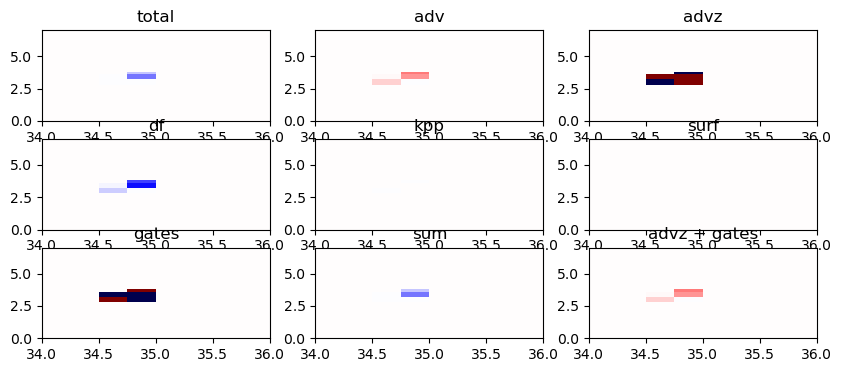

In [371]:
fig = plt.figure()
ax = plt.subplot(331)
ax.pcolormesh(Sbin,Tbin,JtermsS[0],cmap='seismic',vmin=-.1,vmax=.1)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("total")

ax = plt.subplot(332)
ax.pcolormesh(Sbin,Tbin,JtermsS[1],cmap='seismic',vmin=-.1,vmax=.1)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("adv")

ax = plt.subplot(333)
ax.pcolormesh(Sbin,Tbin,JtermsS[2],cmap='seismic',vmin=-.1,vmax=.1)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("advz")


ax = plt.subplot(334)
ax.pcolormesh(Sbin,Tbin,JtermsS[3],cmap='seismic',vmin=-.1,vmax=.1)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("df")


ax = plt.subplot(335)
ax.pcolormesh(Sbin,Tbin,JtermsS[4],cmap='seismic',vmin=-.1,vmax=.1)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("kpp")


ax = plt.subplot(336)
ax.pcolormesh(Sbin,Tbin,JtermsS[5],cmap='seismic',vmin=-.1,vmax=.1)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("surf")

ax = plt.subplot(337)
ax.pcolormesh(Sbin,Tbin,JtermsS[6],cmap='seismic',vmin=-.1,vmax=.1)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("gates")

ax = plt.subplot(338)
ax.pcolormesh(Sbin,Tbin,JtermsS[2] + JtermsS[3] + JtermsS[4] + JtermsS[5] + JtermsS[6],cmap='seismic',vmin=-.1,vmax=.1)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("sum")

ax = plt.subplot(339)
ax.pcolormesh(Sbin,Tbin,JtermsS[2] + JtermsS[6],cmap='seismic',vmin=-.1,vmax=.1)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("advz + gates")


Text(0.5, 1.0, 'gates')

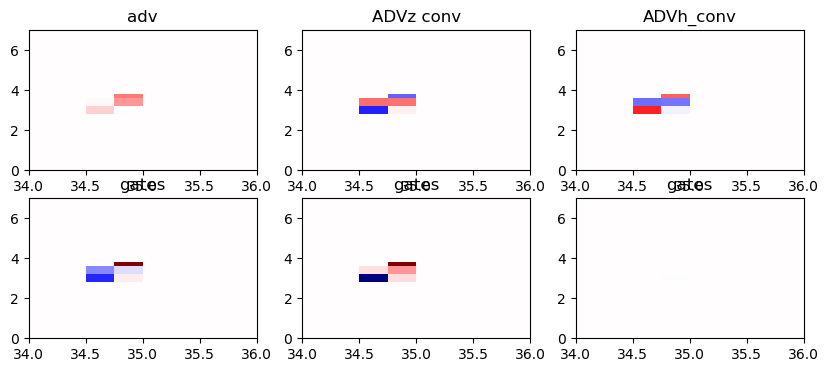

In [377]:
fig = plt.figure()


ax = plt.subplot(231)
ax.pcolormesh(Sbin,Tbin,JtermsS[1],cmap='seismic',vmin=-.1,vmax=.1)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("adv")

ax = plt.subplot(232)
ax.pcolormesh(Sbin,Tbin,JtermsS[2],cmap='seismic',vmin=-10,vmax=10)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("ADVz conv")


ax = plt.subplot(233)
ax.pcolormesh(Sbin,Tbin,JtermsS[6],cmap='seismic',vmin=-10,vmax=10)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("ADVh_conv")

ax = plt.subplot(234)
ax.pcolormesh(Sbin,Tbin,JtermsS[7],cmap='seismic',vmin=-10,vmax=10)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("gates")


ax = plt.subplot(235)
ax.pcolormesh(Sbin,Tbin,JtermsS[7]-JtermsS[6],cmap='seismic',vmin=-10,vmax=10)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("gates")

ax = plt.subplot(236)
ax.pcolormesh(Sbin,Tbin,JtermsS[2]+JtermsS[6],cmap='seismic',vmin=-10,vmax=10)
ax.set_xlim(34,36)
ax.set_ylim(0,7)
ax.set_title("gates")

In [350]:
# read adv and dfe
file_name = "budg3d_hflux_set2"
meta_budg3d_hflux_set2 = parsemeta(dirIn + file_name + "." + tsstr[0] + ".meta")
fldlist = np.array(meta_budg3d_hflux_set2["fldList"])
varnames = np.array(["ADVx_SLT","ADVy_SLT","DFxE_SLT","DFyE_SLT"])
recs = np.array([])
for var in varnames:
    irec = np.where(fldlist == var)
    recs = np.append(recs, irec[0][0])
ADVx_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[0])
ADVy_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[1])
DFxE_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[2])
DFyE_SLT,its,meta = rdmds(os.path.join(dirIn, file_name),t2,returnmeta=True,rec=recs[3])

tmpUo = myparms['rhoconst'] * (ADVx_SLT + DFxE_SLT)
tmpVo = myparms['rhoconst'] * (ADVy_SLT + DFyE_SLT)

# reshape and get the faces
tmpUo = tmpUo.reshape(nz,ny,nx)
tmpVo = tmpVo.reshape(nz,ny,nx)
tmpUo = get_aste_faces(tmpUo,nfx,nfy)              
tmpVo = get_aste_faces(tmpVo,nfx,nfy)

budgO['saltfluxes']['hconv'] = calc_UV_conv_mod(nfx,nfy,tmpUo,tmpVo)
budgO['salthconv'] = calc_UV_conv_mod(nfx,nfy,np.nansum(tmpUo,axis=0),np.nansum(tmpVo,axis=0))

# get the gate hconv
U = ADVx_SLT.reshape(nz, ny, nx)   # x-face flux
V = ADVy_SLT.reshape(nz, ny, nx)   # y-face flux